# Importar librerias

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from PIL import Image
import os
from skimage import color
from skimage import io

In [2]:
#!pip install PyDrive

In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [4]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
!ls /content/drive/MyDrive/Colab_Notebooks/

 Clasificacion_desde_directorio_resnet50.ipynb
 ClasificacionImagenesRandomForest-Copy1.ipynb
'Copy of parcial1_practico (1).ipynb'
'Copy of parcial1_practico (2).ipynb'
'Copy of parcial1_practico.ipynb'
'Daian Fajardo parcial1_practico.ipynb'
 dataset-estadistica
 dataset-estadistica.zip
 Logistica.ipynb
'Spark_ML_estudiantes (1).ipynb'
 Untitled0.ipynb


In [7]:
# Link publico para revisar el folder de las imagenes 
# https://drive.google.com/drive/folders/1z3ionfOVhoEKFGdnFMnOuN9xBsfB_aY1?usp=sharing

# Cargar el Dataset

In [8]:
!unzip /content/drive/MyDrive/Colab_Notebooks/dataset-estadistica.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset-estadistica/train/bounds/nutrient_deficiency/E4ZCFL7MU_3196-3936-3708-4448.png  
  inflating: dataset-estadistica/train/bounds/nutrient_deficiency/E4ZCFL7MU_5514-2888-6026-3400.png  
  inflating: dataset-estadistica/train/bounds/nutrient_deficiency/EN1686G3Z_11837-3119-12349-3631.png  
  inflating: dataset-estadistica/train/bounds/nutrient_deficiency/EXHQ8CU4B_10891-1265-11403-1777.png  
  inflating: dataset-estadistica/train/bounds/nutrient_deficiency/EXHQ8CU4B_10943-5217-11455-5729.png  
  inflating: dataset-estadistica/train/bounds/nutrient_deficiency/EXHQ8CU4B_11455-2145-11967-2657.png  
  inflating: dataset-estadistica/train/bounds/nutrient_deficiency/EZYVD9VAU_2759-3655-3271-4167.png  
  inflating: dataset-estadistica/train/bounds/nutrient_deficiency/EZYVD9VAU_2918-1831-3430-2343.png  
  inflating: dataset-estadistica/train/bounds/nutrient_deficiency/EZYVD9VAU_4675-2040-5187-2552.png  
  inflating: dataset-es

# Visualizar una image

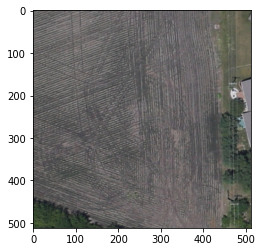

In [9]:
#Cargar la imagen
data = plt.imread('dataset-estadistica/train/rgb/double_plant/EGYI1HN6V_5103-4230-5615-4742.jpg')

#Mostrar la imagen
plt.imshow(data)
plt.show()

# Creación del dataset

In [10]:
#paths
train_path = "dataset-estadistica/train/rgb"
test_path = "dataset-estadistica/test/rgb"

#Numero pixeles
pixel = 512

In [46]:
#Revisar el total de directorios y de imagenes.

totalFiles = 0
totalDir = 0

for base, dirs, files in os.walk(train_path):
    print('Buscando en: ',base)
    for directories in dirs:
      totalDir += 1
    for Files in files:
      totalFiles += 1

print('Total número de archivos',totalFiles)
print('Total número de directorios',totalDir)
print('Total:',(totalDir + totalFiles))

Buscando en:  dataset-estadistica/train/rgb
Buscando en:  dataset-estadistica/train/rgb/endrow
Buscando en:  dataset-estadistica/train/rgb/waterway
Buscando en:  dataset-estadistica/train/rgb/planter_skip
Buscando en:  dataset-estadistica/train/rgb/storm_damage
Buscando en:  dataset-estadistica/train/rgb/water
Buscando en:  dataset-estadistica/train/rgb/drydown
Buscando en:  dataset-estadistica/train/rgb/nutrient_deficiency
Buscando en:  dataset-estadistica/train/rgb/weed_cluster
Buscando en:  dataset-estadistica/train/rgb/double_plant
Total número de archivos 1080
Total número de directorios 9
Total: 1089


In [12]:
#Revisar los labels
classes  = os.listdir(train_path)

#Contar el numero de imagenes por label
archivos = []
totalFiles = 0

for i in classes :
  totalFiles = 0

  for Files in files:
    totalFiles += 1

  archivos.append(totalFiles)

In [13]:
classes

['endrow',
 'waterway',
 'planter_skip',
 'storm_damage',
 'water',
 'drydown',
 'nutrient_deficiency',
 'weed_cluster',
 'double_plant']

In [14]:
#Creando la y
y = []

for j in range(0,len(classes)):
  etiqueta = np.full((archivos[j]), classes[j])
  y = np.append(y,etiqueta)

In [15]:
print(y)
print(y.shape)

['endrow' 'endrow' 'endrow' ... 'double_plant' 'double_plant'
 'double_plant']
(1080,)


In [16]:
nclasses = len(classes)
nclasses

9

In [17]:
# Crar la x
X = np.zeros(pixel*pixel)  

for l in classes: 
  path = "{raiz}/{path}/".format(raiz=train_path, path=l)
  
  for k in os.listdir(path):
    img = color.rgb2gray(io.imread(path+k)) #Como funciona
    arr = np.array(img)
    flat_arr = arr.ravel()
    
    X = np.vstack([X, flat_arr])

In [18]:
X = np.delete(X, 0 ,0)

In [19]:
print(X)
print(X.shape)

[[0.24443137 0.23349294 0.24158196 ... 0.1871702  0.20735137 0.21855059]
 [0.44170078 0.42209294 0.41817137 ... 0.36719098 0.37111255 0.37895569]
 [0.37420863 0.37028706 0.36244392 ... 0.39157647 0.39157647 0.3876549 ]
 ...
 [0.42077725 0.38548314 0.35411059 ... 0.70332039 0.69547725 0.69939882]
 [0.56099961 0.56884275 0.58060745 ... 0.61255333 0.65485725 0.65485725]
 [0.40799098 0.41975569 0.43152039 ... 0.54046118 0.52869647 0.51693176]]
(1080, 262144)


In [20]:
#Revisar cuantas imagenes por label exixten
pd.Series(y).value_counts()

water                  120
double_plant           120
storm_damage           120
weed_cluster           120
waterway               120
endrow                 120
drydown                120
nutrient_deficiency    120
planter_skip           120
dtype: int64

['endrow', 'waterway', 'planter_skip', 'storm_damage', 'water', 'drydown', 'nutrient_deficiency', 'weed_cluster', 'double_plant']


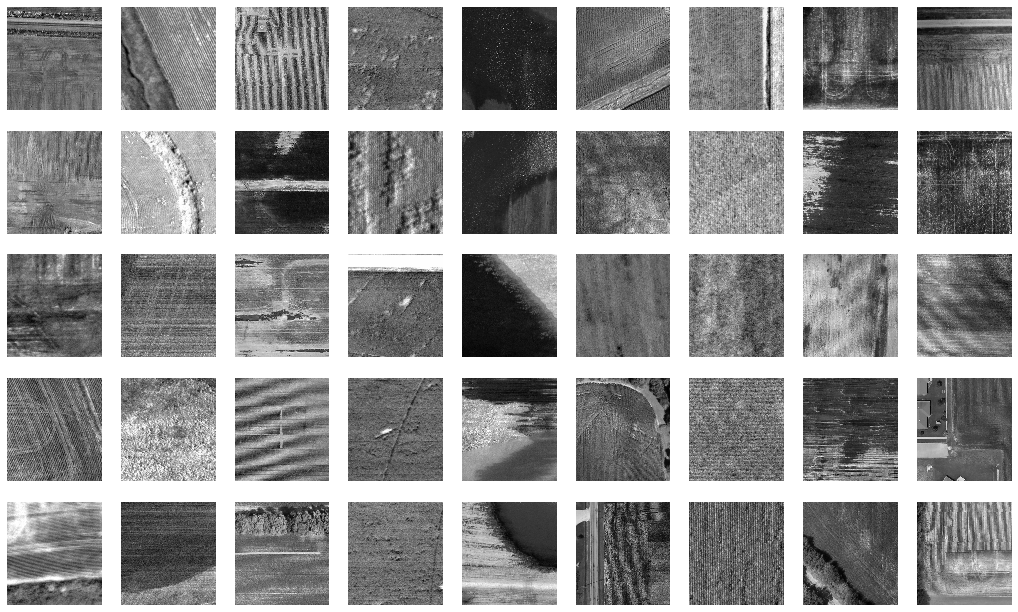

In [47]:
#Mostrar 5 imagenes de cada una de las clases
samples_per_class = 5
figure = plt.figure(figsize=(nclasses*2,(1+samples_per_class*2)))

for idx_cls, cls in enumerate(classes):
  idxs = np.flatnonzero(y == cls)
  idxs = np.random.choice(idxs, samples_per_class, replace=False)
  for i, idx in enumerate(idxs):
    plt_idx = i * nclasses + idx_cls + 1
    p = plt.subplot(samples_per_class, nclasses, plt_idx)
    p = sns.heatmap(np.reshape(X[idx], (pixel,pixel)), cmap=plt.cm.gray, xticklabels=False, yticklabels=False, cbar=False)
    p = plt.axis('off')

print(classes)

# Preparación de data

Se separará la data entre test y training, se utiliza train_test_split de sklearn.model_selection.
Aqui se especificará cuantas imagenes se usaran de test y cuantas de training.
Tambien se esaclaran cada caracteristicas entre valores de 0 y 1.

In [22]:
#tamaño del test
test_size = 0.20

# Seed para producir el mismo resultado 
seed = 9

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [23]:
#scaling las caracteristicas

X_train_scaled = X_train/255
X_test_scaled = X_test/255

# Entrenar el modelo con Regresión Logistica

A diferencia de la regresión lineal, en la regresión logística no existe una solución de forma cerrada para la estimación del parámetro por mínimos cuadrados. Por lo tanto, necesitamos utilizar un "solucionador" que encuentre una solución numérica. 

Hay varios solucionadores disponibles para usar con LogisticRegression de sklearn, pero no todos soportan todas las variedades de regresión logística.Usaremos el solucionador saga, que:
* Funciona bien cuando hay un gran número de muestras
* Soporta la regresión logística sin penalización de regularización, penalización L1, penalización L2, o ElasticNet (que utiliza ambas penalizaciones), 
* Admite la regresión multinomial con múltiples clases, utilizando la función softmax.

Además de especificar qué solucionador queremos usar, también especificamos una tolerancia, que da un criterio de parada para el solucionador. Una tolerancia más alta terminará más rápido, pero puede no encontrar la solución óptima.

In [24]:
clf = LogisticRegression(penalty='none', 
                         tol=0.1, solver='saga',
                         multi_class='multinomial').fit(X_train_scaled, y_train)

(9, 262144)

# Interpretando los Coeficientes

Una de las ventajas de la regresión logística es su capacidad de interpretación: podemos utilizar los valores de los coeficientes para entender qué características (es decir, qué píxeles) son importantes para determinar a qué clase pertenece una muestra.El siguiente gráfico muestra el vector de coeficientes para cada clase, con los coeficientes positivos en azul y los negativos en rojo.

Podemos ver qué píxeles están asociados positivamente con la pertenencia a la clase, y qué píxeles están asociados negativamente con la pertenencia a la clase.
* Si una muestra tiene valores grandes en los píxeles mostrados en azul, la probabilidad de que esa muestra sea la caracteristica buscada aumenta. 
* Si la muestra tiene valores grandes en los píxeles del centro de la imagen, la probabilidad de que la muestra sea la caracteristica buscada disminuye
* Muchos píxeles tienen coeficientes cuya magnitud es muy pequeña. Estos se muestran en blanco, y no son muy importantes para esta tarea de clasificación.


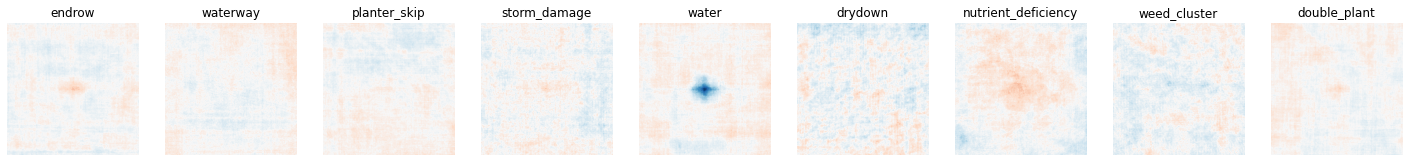

In [25]:
scale = np.max(np.abs(clf.coef_))

p = plt.figure(figsize=(25, 2.5));

for i in range(nclasses):
    p = plt.subplot(1, nclasses, i + 1)
    p = plt.imshow(clf.coef_[i].reshape(pixel, pixel),
                  cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    p = plt.axis('off')
    p = plt.title(classes[i])

# Traer un Ejemplo

(-0.5, 511.5, 511.5, -0.5)

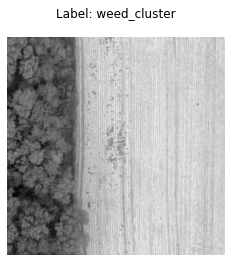

In [26]:
#Index de la imagen de ejemplo 
sample_idx = 200

#plotting imagen
plt.imshow(X_test_scaled[sample_idx].reshape(512,512), cmap='gray')
plt.title('Label: %s\n' % y_test[sample_idx])
plt.axis('off')

# Usar fitted logistic regression

Calcular la probabilidad condicional de cada clase, para esta muestra.Aquí, la primera entrada es la probabilidad de pertenecer a la clase 0, la segunda entrada es la probabilidad de pertenecer a la clase 1, etc.

In [27]:
z = [ clf.intercept_[k] + np.dot(clf.coef_[k], X_test_scaled[sample_idx]) for k in range(len(classes)) ]

#Probabilidad condicional 
exps = [np.exp(z[k]) for k in range(len(classes))]
exps_sum = np.sum(exps)
probs = exps/exps_sum
probs

for i in range(0, len(classes)):
  print("La probabilidad de", i,classes[i], probs[i])

La probabilidad de 0 endrow 0.12007148944703942
La probabilidad de 1 waterway 0.10164561050346736
La probabilidad de 2 planter_skip 0.12928048213865334
La probabilidad de 3 storm_damage 0.1413905163919074
La probabilidad de 4 water 0.0853876202936635
La probabilidad de 5 drydown 0.124170005114409
La probabilidad de 6 nutrient_deficiency 0.05491493055058167
La probabilidad de 7 weed_cluster 0.08927728929190532
La probabilidad de 8 double_plant 0.15386205626837302


0 endrow
1 waterway
2 planter_skip
3 storm_damage
4 water
5 drydown
6 nutrient_deficiency
7 weed_cluster
8 double_plant


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


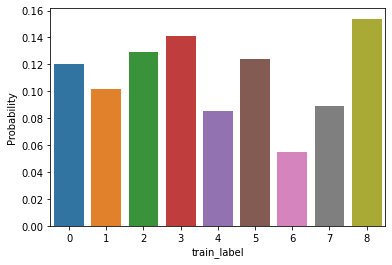

In [28]:
#plot
sns.barplot(np.arange(0,len(classes)), probs)
plt.ylabel("Probability")
plt.xlabel("train_label")

for i in range(0, len(classes)):
  print(i,classes[i])

# Predicción

En general, para obtener la etiqueta predicha, podemos encontrar la clase con la mayor probabilidad. La implementación de LogisticRegression en sklearn incluye funciones para calcular tanto la probabilidad por clase como la etiqueta más probable. Para cada muestra, devuelve 10 probabilidades - una para cada una de las diez clases (es decir, cada valor de k).

Utilizamos la función predecir para predecir una etiqueta para cada muestra del conjunto de pruebas. Esto devolverá la etiqueta de clase con la mayor probabilidad.

In [29]:
#predictied label
idx_cls = np.argmax(probs)
print(idx_cls)
print(classes[idx_cls])

8
double_plant


In [30]:
#prediction probabilities
y_pred_prob = clf.predict_proba(X_test_scaled)

In [31]:
y_pred_prob[sample_idx]
y_pred = clf.predict(X_test_scaled)
print("Label test:", y_test[sample_idx], "Label prediction:",y_pred[sample_idx])

Label test: weed_cluster Label prediction: weed_cluster


# Otros Ejemplos

(-0.5, 511.5, 511.5, -0.5)

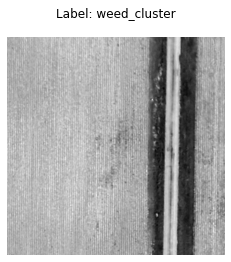

In [32]:
#sample number
sample_idx = 1
#plotting image
plt.imshow(X_test_scaled[sample_idx].reshape(512,512), cmap='gray')
plt.title('Label: %s\n' % y_test[sample_idx])
plt.axis('off')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0 endrow
1 waterway
2 planter_skip
3 storm_damage
4 water
5 drydown
6 nutrient_deficiency
7 weed_cluster
8 double_plant


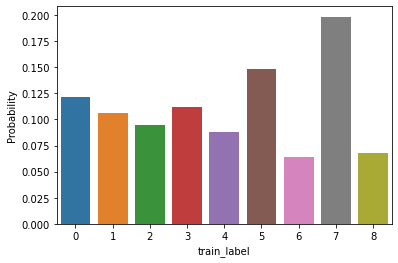

In [33]:
z = [ clf.intercept_[k] + np.dot(clf.coef_[k], X_test_scaled[sample_idx]) for k in range(len(classes)) ]
z
#conditional probability
exps = [np.exp(z[k]) for k in range(len(classes))]
exps_sum = np.sum(exps)
probs = exps/exps_sum
probs
#plot
sns.barplot(np.arange(0,len(classes)), probs)
plt.ylabel("Probability")
plt.xlabel("train_label")

for i in range(0, len(classes)):
  print(i,classes[i])

In [34]:
#predictied label
idx_cls = np.argmax(probs)
classes[idx_cls]
#actual label
y_test[sample_idx]
#prediction probabilities
y_pred_prob = clf.predict_proba(X_test_scaled)

In [35]:
y_pred_prob[sample_idx]
y_pred = clf.predict(X_test_scaled)

print('Label:', y_test[sample_idx], ', Predicted:', y_pred[sample_idx])

Label: weed_cluster , Predicted: waterway


# Evaluación del algoritmo

A continuación se calcula de diferente formas el Acurracy.

Para un problema multiclase, podemos ampliar la matriz de confusión para que tenga más filas y columnas. La diagonal de la matriz de confusión multiclase muestra el número de clasificaciones correctas para cada clase, y las otras entradas muestran los casos en los que a una muestra de una clase se le asignó erróneamente una etiqueta de clase diferente.Podemos crear una matriz de confusión utilizando la función crosstab de la biblioteca pandas.


In [36]:
#method 1
accuracy =  np.mean(y_test == y_pred)
print(accuracy)
#method 2
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
#method 3
accuracy = clf.score(X_test_scaled, y_test)
print(accuracy)

0.18981481481481483
0.18981481481481483
0.18981481481481483


In [45]:
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

       double_plant       0.12      0.04      0.06        24
            drydown       0.09      0.31      0.14        16
             endrow       0.29      0.16      0.21        25
nutrient_deficiency       0.14      0.08      0.11        24
       planter_skip       0.38      0.31      0.34        26
       storm_damage       0.11      0.04      0.06        25
              water       0.21      0.33      0.25        24
           waterway       0.19      0.58      0.29        19
       weed_cluster       1.00      0.03      0.06        33

           accuracy                           0.19       216
          macro avg       0.28      0.21      0.17       216
       weighted avg       0.32      0.19      0.16       216



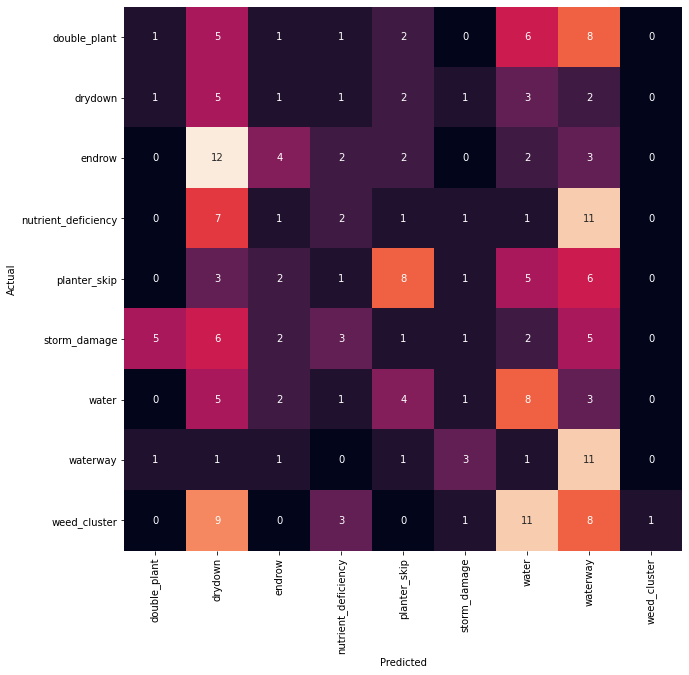

In [37]:
cm = pd.crosstab(y_test, y_pred, 
                               rownames=['Actual'], colnames=['Predicted'])
p = plt.figure(figsize=(10,10));
p = sns.heatmap(cm, annot=True, fmt="d", cbar=False)

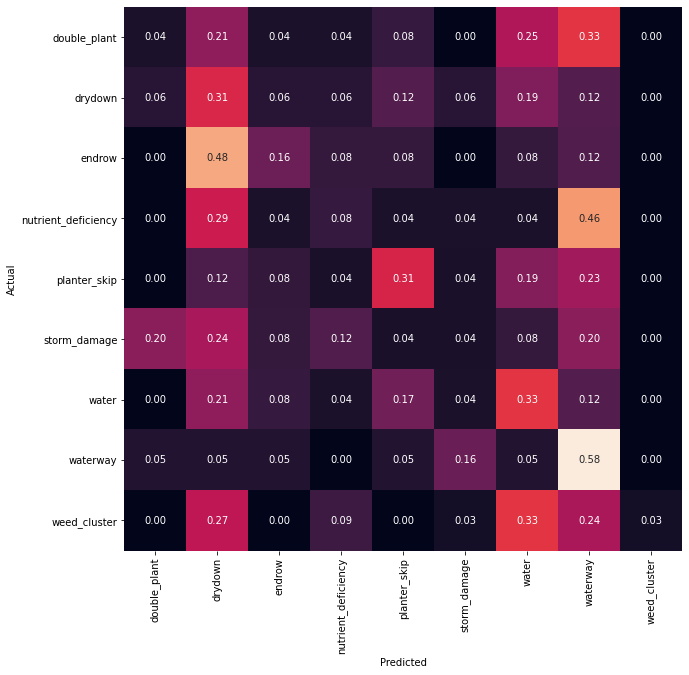

In [38]:
#Aquí hay una versión que es ligeramente más fácil de interpretar: 
#normalizado la matriz de confusión por filas, de modo que las entradas de la diagonal muestran la precisión por clase.

cm = pd.crosstab(y_test, y_pred, 
                               rownames=['Actual'], colnames=['Predicted'], normalize='index')
p = plt.figure(figsize=(10,10));
p = sns.heatmap(cm, annot=True, fmt=".2f", cbar=False)